In [292]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from yellowbrick.regressor import AlphaSelection, residuals_plot
## for explainer
#from lime import lime_tabular
import altair as alt

In [293]:
#common function

def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
    
## scale the data using Standard scaler
def scale_data(df):
    scaler = preprocessing.StandardScaler()
    df_scaled = df.copy()
    column_names = df.columns
    scaler = preprocessing.StandardScaler().fit(df_scaled.values)
    features = scaler.transform(df_scaled.values)
    df_scaled[column_names] = features
    return df_scaled

def calculate_vif(vif_df):
    vif = pd.DataFrame()
    vif['features'] = vif_df.columns
    vif['VIF_score'] = [variance_inflation_factor(vif_df.values,i) for i in range(vif_df.shape[1])]
    return(vif)
  

In [271]:
df1 = pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy1/data/train.csv')

In [272]:
df2 = pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy1/data/unique_m.csv')

In [273]:
df1.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [274]:
df1=df1.drop(['critical_temp'],axis=1)

In [275]:
df2.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [276]:
#Join both the datasets
df = pd.concat([df1,df2],axis=1)
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [277]:
#Remove all columns with only zeros
df_clean = df.loc[:, (df != 0).any(axis=0)]

In [278]:
df_clean=df_clean.drop(['material'],axis=1)
df_clean

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84


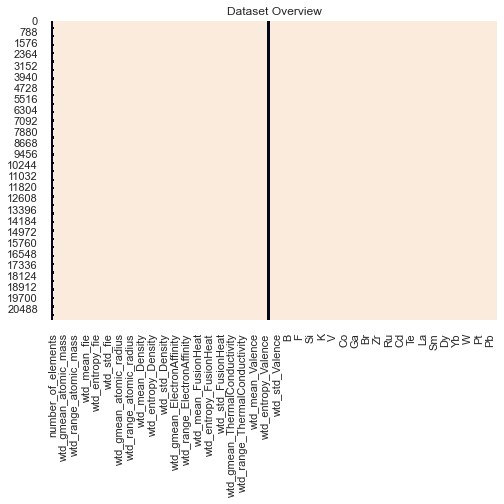

 Categerocial   Numeric   NaN 


In [279]:
dic_cols = {col:utils_recognize_type(df_clean, col, max_cat=10) for col in df_clean.columns}
heatmap = df_clean.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
heatmap
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [281]:
alphas = np.linspace(10,-2,100)
alphas

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [282]:
y = df_clean.loc[:, df_clean.columns == 'critical_temp']
X = df_clean.loc[:, df_clean.columns != 'critical_temp']

In [283]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=1234)

In [288]:
## print info
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train),2))
print("y_test mean:", round(np.mean(y_test),2))


X_train shape: (17010, 158) | X_test shape: (4253, 158)
y_train mean: critical_temp    34.4
dtype: float64
y_test mean: critical_temp    34.5
dtype: float64


In [284]:
# Time to scale the data using Standard scaler
df_clean_scaled = scale_data(df_clean)
X_train_scaled = scale_data(X_train)
X_test_scaled = scale_data(X_test)

y_train_scaled = scale_data(y_train)
y_test_scaled = scale_data(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1653203.4917857824, tolerance: 1585.45473311384
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2178882.631617428, tolerance: 1593.0905709369488
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not conver

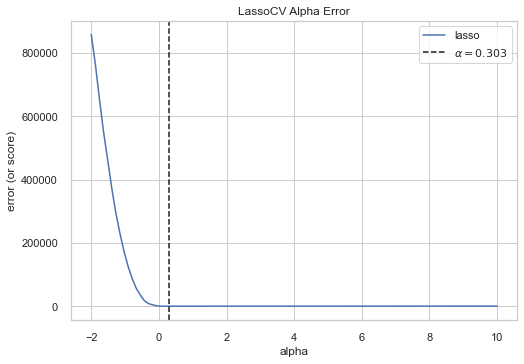

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [285]:
# Instantiate the linear model and visualizer
model = linear_model.LassoCV(alphas=alphas, n_jobs=-1, random_state=1234)
visualizer = AlphaSelection(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()


Text(0.5, 1.0, 'pearson correlation')

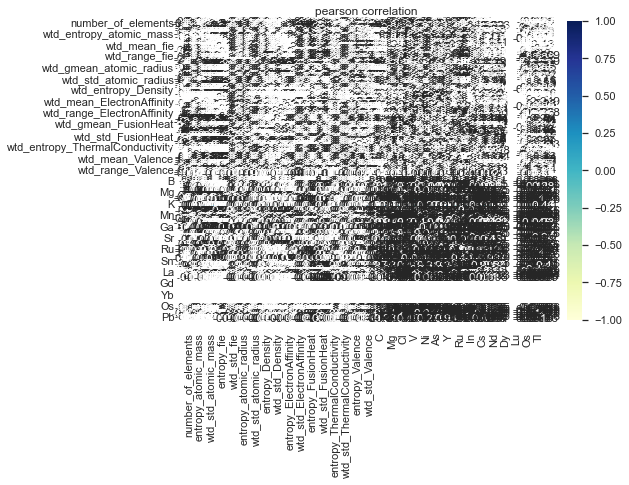

In [107]:
corr_matrix = X_train[:20].corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

### VIF

In [295]:
vif_scores = calculate_vif(X_train)

In [300]:
vif_scores = vif_scores.sort_values(['VIF_score'], ascending=False).reset_index(drop=True)
vif_scores.head(30)

,features,VIF_score
0,wtd_mean_fie,369936.492267
1,wtd_gmean_fie,330694.857343
2,mean_fie,205327.172463
3,gmean_fie,184122.266136
4,wtd_mean_atomic_radius,84830.314569
5,wtd_gmean_atomic_radius,67942.366296
6,mean_atomic_radius,65290.394503
7,entropy_fie,62557.265262
8,gmean_atomic_radius,55841.947538
9,entropy_atomic_radius,47088.121398


### Lasso L1 regularization feature selection using SelectFromModel

In [335]:
feature_names = X_train.columns
## L1 regularization
selector = feature_selection.SelectFromModel(estimator = linear_model.Lasso(alpha=0.303, fit_intercept=True), max_features=15).fit(X_train_scaled,y_train)
L1_regularization_selected_features_SelectFromModel = feature_names[selector.get_support()]


In [343]:
L1_regularization_selected_features_SelectFromModel
type(L1_regularization_selected_features_SelectFromModel)

pandas.core.indexes.base.Index

### Lasso L1 regularization feature selection

In [337]:
lass_reg_tunned = linear_model.Lasso(alpha=0.303,random_state=1234,selection='random',warm_start=True)
lass_reg_tunned.fit(X_train_scaled,y_train)

Lasso(alpha=0.303, random_state=1234, selection='random', warm_start=True)

In [339]:
coef_df = pd.DataFrame(lass_reg_tunned.coef_,X.columns,columns=['Coefficients']).reset_index()
coef_df = coef_df.rename(columns=({'index':'Features'}))
coef_df = coef_df.sort_values(by='Coefficients',ascending=False)
feature_imp = coef_df.head(15)
print(feature_imp)
L1_regularization_selected_features = feature_imp['Features'].tolist()

                            Features  Coefficients
62      wtd_mean_ThermalConductivity     10.557090
131                               Ba      8.427284
7                  range_atomic_mass      5.246427
157                               Bi      3.950656
6            wtd_entropy_atomic_mass      3.278863
70       wtd_std_ThermalConductivity      2.922905
66   wtd_entropy_ThermalConductivity      2.405447
97                                Ca      2.130586
27               range_atomic_radius      1.974783
154                               Hg      1.512094
11                          mean_fie      1.384653
155                               Tl      1.041903
56            wtd_entropy_FusionHeat      1.009875
49              std_ElectronAffinity      0.645801
78                 wtd_range_Valence      0.435917


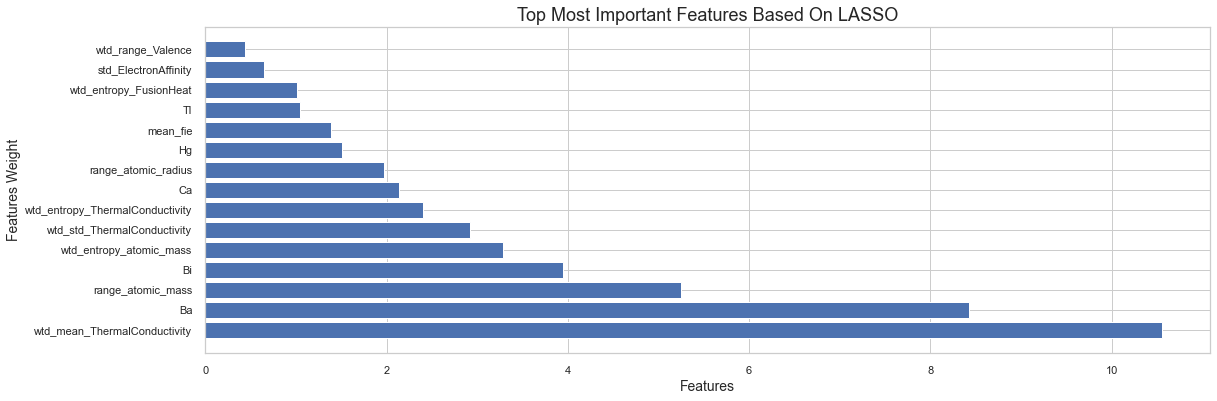

In [340]:
plt.figure(figsize=(18,6))

plt.barh('Features','Coefficients',data=feature_imp)
plt.title('Top Most Important Features Based On LASSO',size=18)
plt.xlabel('Features',size=14)
plt.ylabel('Features Weight',size=14)
plt.rcParams['axes.spines.right']=False # remove the plot border
plt.rcParams['axes.spines.left']=False # remove the plot border
plt.rcParams['axes.spines.top']=False # remove the plot border
plt.rcParams['axes.spines.bottom']=False # remove the plot border
plt.show()

### Ridge Regression L2 model for predicting Critical Temperature

#### Based on the Lasso Regression L1 we have identified important features for fitting the model using Ridge Regression L2

###### Let us use important features from L1_regularization_selected_features

In [392]:
# Train data
X_train_scaled_imp_features_SelectFromModel = X_train_scaled[L1_regularization_selected_features_SelectFromModel.tolist()]
X_train_scaled_imp_features = X_train_scaled[L1_regularization_selected_features]

#test data

X_test_scaled_imp_features_SelectFromModel = X_test_scaled[L1_regularization_selected_features_SelectFromModel.tolist()]
X_test_scaled_imp_features = X_test_scaled[L1_regularization_selected_features]

In [396]:
alphas = np.linspace(10, 1, 100)

In [397]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_scaled_imp_features_SelectFromModel, y_train)
ridgecv.alpha_

3.909090909090909

In [404]:
ridge_model = linear_model.Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(X_train_scaled_imp_features_SelectFromModel, y_train)             # Fit a ridge regression on the training data
ridge_pred = ridge_model.predict(X_test_scaled_imp_features_SelectFromModel)           # Use this model to predict the test data

print(pd.DataFrame(ridge_model.coef_[0], index = X_train_scaled_imp_features_SelectFromModel.columns)) # Print coefficients
print(metrics.mean_squared_error(y_test_scaled, ridge_pred))  

                                         0
wtd_entropy_atomic_mass           2.612440
range_atomic_mass                 9.516823
wtd_std_atomic_mass              -6.953319
range_atomic_radius               4.816506
wtd_gmean_ElectronAffinity       -3.448281
wtd_entropy_ElectronAffinity     -4.804081
wtd_mean_ThermalConductivity     14.136060
wtd_gmean_ThermalConductivity   -13.347938
wtd_entropy_ThermalConductivity   4.218090
wtd_std_ThermalConductivity       1.002136
wtd_std_Valence                  -4.443615
Si                               -3.364158
Ca                                1.597413
Ba                                8.483141
Bi                                4.620563
1980.408949535995


In [405]:
ridgecv = linear_model.RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_scaled_imp_features, y_train)
ridgecv.alpha_


10.0

In [407]:
ridge_model = linear_model.Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(X_train_scaled_imp_features, y_train)             # Fit a ridge regression on the training data
ridge_pred = ridge_model.predict(X_test_scaled_imp_features)           # Use this model to predict the test data

print(pd.DataFrame(ridge_model.coef_[0], index = X_train_scaled_imp_features.columns)) # Print coefficients
print(metrics.mean_squared_error(y_test_scaled, ridge_pred))  

                                         0
wtd_mean_ThermalConductivity      1.738739
Ba                                8.596861
range_atomic_mass                -0.875853
Bi                                4.314279
wtd_entropy_atomic_mass           4.914843
wtd_std_ThermalConductivity      12.908193
wtd_entropy_ThermalConductivity   1.199396
Ca                                3.943329
range_atomic_radius               4.034821
Hg                                3.452426
mean_fie                          1.495032
Tl                                2.691354
wtd_entropy_FusionHeat           -0.888273
std_ElectronAffinity             -1.506279
wtd_range_Valence                -0.184570
1921.6032651022915


### Gradient Boosting feature selection

In [156]:
X = X_train
y = y_train
feature_names = X_train.columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf

    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [296]:
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,"VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
#dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
#dtf_importances = dtf_importances.set_index("VARIABLE")


dtf_importances.head(20)

,IMPORTANCE,VARIABLE
106,0.661732,Cu
97,0.052024,Ca
131,0.046388,Ba
67,0.026066,range_ThermalConductivity
73,0.016423,gmean_Valence
80,0.016211,wtd_std_Valence
34,0.013435,wtd_gmean_Density
74,0.012731,wtd_gmean_Valence
9,0.010483,std_atomic_mass
87,0.010244,O


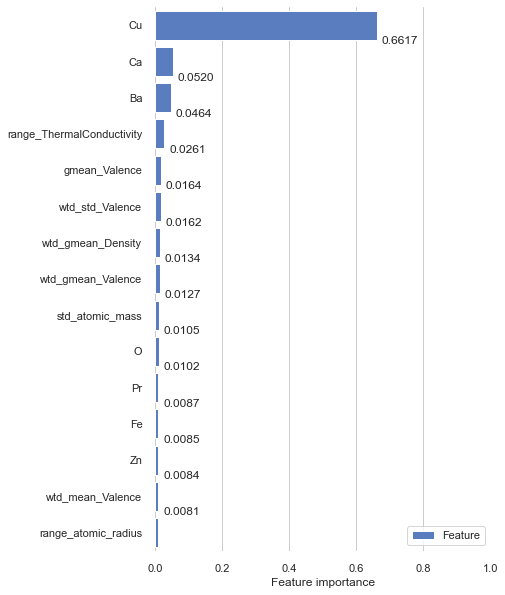

In [158]:

dtf_importances = dtf_importances.sort_values(['IMPORTANCE'], ascending=False).reset_index(drop=True)


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))

# Load the example car crash dataset
#feature_imp_data = sns.load_dataset("dtf_importances").sort_values("IMPORTANCE", ascending=False)

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(x="IMPORTANCE", y="VARIABLE", data=dtf_importances.head(15), label="Feature", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Feature importance")
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')
sns.despine(left=True, bottom=True)

